## Parcial Final

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import scipy.optimize as spo

## Teórico:

Partiendo de las siguientes premisas:
    
$$
\sum \vec F =m(\vec a +2 \vec w \times \vec v)\\
\vec w=[-wcos\lambda,0,wsin\lambda]\\
\vec r= [rcos\theta,rsin\theta,r]
$$

Y de que $wr=v$. Podemos obtener el vector de velocidad a partir de:


$$
\begin{equation}
\begin{split}
\vec v&=\vec w\times \vec r \\
&=\begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\end{split}
\end{equation}
$$


De modo que se puede plantear la siguiente ecuación:

$$\begin{equation}
\begin{split}
-m\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}
&= 
m\Big(\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} + 2\begin{pmatrix}
-wcos\lambda\\
0\\
wsin\lambda
\end{pmatrix}\times \begin{pmatrix}
-wrsin\theta sin\lambda\\
wrcos\lambda\\
-wrcos\lambda sin\theta
\end{pmatrix}
\Big)\\
-\begin{pmatrix}
0\\
0\\
g
\end{pmatrix}&=\begin{pmatrix}
\ddot{x}\\
\ddot{y}\\
\ddot{z}
\end{pmatrix} +2\begin{pmatrix}
-w^2 r sin\lambda cos\lambda\\
w^2rsin^2\theta sen\theta + w^2rcos^2\lambda cos\theta\\
-w^2 r cos^2\lambda
\end{pmatrix}
\end{split}
\end{equation}
$$

De esta manera obtenemos el siguiente sistema de ecuaciones:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2w^2rsin^2 \lambda cos \lambda \\
\ddot{y}&=-2w^2rcos^2\lambda sin\theta - 2w^2rsin\lambda sin\theta\\
\ddot{z}&=-g+2w^2rcos^2\lambda
\end{split}
\end{equation}
$$

Y teniendo en cuenta el vector de velocidad hallado previamente tenemos que:

$$
\begin{equation}
\begin{split}
\dot{x}&=wrsin\lambda sin\theta\\
\dot{y}&=wrcos\lambda\\
\dot{z}&=wrcos\lambda sin\theta
\end{split}
\end{equation}
$$

Por lo tanto, llegamos a:

$$
\begin{equation}
\begin{split}
\ddot{x}&=2wsin\lambda \dot{y}\\
\ddot{y}&=-2wcos\lambda \dot{x}-2wsin\lambda \dot{x}\\
\ddot{z}&=-g + 2wcos\lambda \dot{y}
\end{split}
\end{equation}
$$

## Parte 1

a, b)

In [229]:
datos=pd.read_csv('Datos.txt')
lam_30= datos[datos.angle==30]
lam_30

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


c)

In [230]:
h_=sym.Symbol('h',real=True)
w_=sym.Symbol('w',real=True)
lamd=sym.Symbol('lambda',real=True)
g_=sym.Symbol('g',real=True)

def Coriolis_sym(h,w,lam,g):
    res=(2*(2**(1/2))/3) *w*sym.cos(lam)*((h**3)/g)**(1/2)
    return res

Coriolis_sym(h_,w_,lamd,g_)

0.942809041582063*w*(h**3/g)**0.5*cos(lambda)

In [231]:
def Coriolis_np(h,w,lam,g):
    ang=lam*2*np.pi/360
    res=(2*(2**(1/2))/3) *w*np.cos(ang)*((h**3)/g)**(1/2)
    return res

d)

In [232]:
def chi2(w,h,y,sigmay,angle,g):
    resp=np.sum((y-Coriolis_np(h,w,angle,g))**2 /(2*sigmay**2))
    return resp

e)

In [233]:
h=lam_30.h
y=lam_30.y
sigmay=lam_30.sigmay
angle=lam_30.angle
g=9.81

nll=lambda *w:chi2(*w)
p0=np.ones(1)


In [234]:
minimizar = spo.minimize( nll, p0, args=(h,y,sigmay,angle,g),options={'disp':True} )

bestparam=minimizar.x
bestparam


Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

f)

Text(0, 0.5, 'y[m]')

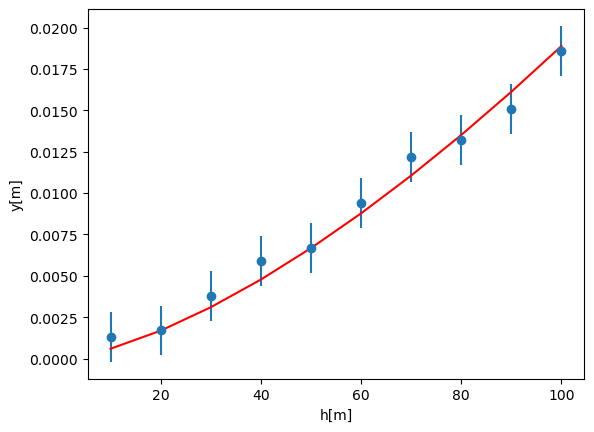

In [235]:
_x = np.linspace(np.min(h),np.max(h),10)
_y = Coriolis_np(_x,bestparam,angle,g)

plt.errorbar(h,y,yerr=sigmay,fmt='o')
plt.plot(_x,_y,color='r')
plt.xlabel('h[m]')
plt.ylabel('y[m]')

## Parte 2:
## Propagarción de la incertidumbre de la aceleración de la gravedad:

a, b, c, d, e)

In [236]:
N=300
Gravedad=np.zeros(300)

y_arr=np.array(y)
sigmay_arr=np.array(sigmay)
Omega=np.zeros(300)

for i in range(N):
    g_i= 9.81+np.random.normal(loc=0,scale=1)
    y_n=y_arr+np.random.normal(loc=0,scale=sigmay_arr[0],size=len(y_arr))
    Gravedad[i]=g_i
    optim = spo.minimize( nll, p0, args=(h,y_n,sigmay,angle,g_i),options={'disp':True} )
    Omega[i]=optim.x
    

Optimization terminated successfully.
         Current function value: 8.069696
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 8.008328
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 1.605895
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
Optimization terminated successfully.
         Current function value: 2.505901
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.081614
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 4.333710
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 10.592053
         Iterations: 2
         Function evaluation

         Current function value: 7.894091
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 7.240545
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.379259
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 7.975614
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.448998
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.003112
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 7.105206
         Iterations: 2
         Function evaluation

         Current function value: 7.785235
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 2.773769
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 1.339883
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 3.360846
         Iterations: 2
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 6.959103
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 5.390587
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.413650
         Iterations: 3
         Function evaluatio

Optimization terminated successfully.
         Current function value: 6.559519
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 10.663859
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 3.751242
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 4.543732
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.268394
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 6.080096
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 4.121970
         Iterations: 2
         Function evaluations: 62
         Gradient evaluations

         Current function value: 5.092583
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
Optimization terminated successfully.
         Current function value: 7.569076
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 4.297138
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 6.108104
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 8.198096
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 6.076067
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.643187
         Iterati

Optimization terminated successfully.
         Current function value: 1.691141
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.053534
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 7.037092
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.888886
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.381500
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.447717
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 9.903529
         Iterati

         Current function value: 8.867616
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 4.277394
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 5.307285
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 4.003620
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.339411
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 9.048146
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 4.193563
         Iterations: 2
         Function evaluations

f)

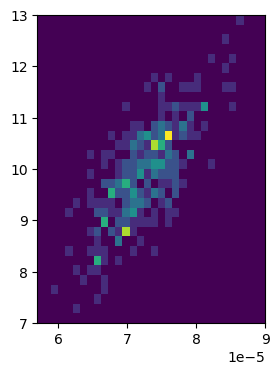

In [237]:
binsx=np.linspace(5.7e-5,9e-5,33)
binsy=np.linspace(7,13,33)
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(binsx,binsy))

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(131)
plt.imshow(H2.T, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]], aspect='auto')



g)

Las variables sí están correlacionadas ya que en la gráfica se percibe una pendiente positiva. De modo que esto implica la correlación entre las variables implicadas.

h)

In [238]:
H1=np.sum(H2,axis=1)
H1

array([ 0.,  0.,  1.,  0.,  2.,  3.,  1.,  7., 14., 16., 13., 16., 28.,
       27., 22., 18., 27., 27., 26., 16.,  9.,  9.,  4.,  5.,  2.,  0.,
        3.,  3.,  1.,  0.,  0.,  0.])

i)

In [240]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )

ij,ii,ji

(5, 16, 27)

j)

In [241]:
int_lower_30=binsx[ij]
best_w_30=binsx[ii]
int_upper_30=binsx[ji]

int_lower_30,int_upper_30,best_w_30

(6.215625000000001e-05, 8.484375000000001e-05, 7.35e-05)

Para $\lambda=10$:

In [220]:
lam_10= datos[datos.angle==10]
h=lam_10.h
y=lam_10.y
sigmay=lam_10.sigmay

In [221]:
N=300
Gravedad=np.zeros(300)

y_arr=np.array(y)
sigmay_arr=np.array(sigmay)
Omega=np.zeros(300)

for i in range(N):
    g_i= 9.81+np.random.normal(loc=0,scale=1)
    y_n=y_arr+np.random.normal(loc=0,scale=sigmay_arr[0],size=len(y_arr))
    Gravedad[i]=g_i
    optim = spo.minimize( nll, p0, args=(h,y_n,sigmay,10,g_i),options={'disp':True} )
    Omega[i]=optim.x
    

         Current function value: 5.574456
         Iterations: 2
         Function evaluations: 48
         Gradient evaluations: 18
         Current function value: 15.762598
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 9.834380
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 7.551132
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 5.738038
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.946586
         Iterations: 2
         Function evaluations: 86
         Gradient evaluations: 37
         Current function value: 4.563613
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 6.025076
         Iterations: 2
  

         Current function value: 5.695254
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 7.396936
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4
         Current function value: 11.013840
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 5.339532
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 12.693723
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 10.240777
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 7.080856
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function val

         Current function value: 8.883313
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 5.382617
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 7.568459
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 9.592090
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.397442
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 3.719219
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 6.388878
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 10.265693
         Iterations: 2
   

         Current function value: 9.613649
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 24
         Current function value: 7.674412
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 6.054704
         Iterations: 2
         Function evaluations: 74
         Gradient evaluations: 31
         Current function value: 8.199549
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 13.927768
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 3.033029
         Iterations: 2
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 5.320831
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 9.390639
         Iterations: 2
   

         Current function value: 12.461479
         Iterations: 2
         Function evaluations: 70
         Gradient evaluations: 29
         Current function value: 10.394984
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 4.965406
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 7.586808
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 9.963625
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 8.682664
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 13.963327
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.251225
         Iterations: 2
 

         Current function value: 10.473024
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 7.727283
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 7.103281
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 13.388058
         Iterations: 2
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 8.145215
         Iterations: 2
         Function evaluations: 82
         Gradient evaluations: 35
         Current function value: 10.548294
         Iterations: 2
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 6.627301
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 7.009291
         Iterations: 2
 

         Current function value: 7.228218
         Iterations: 2
         Function evaluations: 76
         Gradient evaluations: 32
         Current function value: 6.723780
         Iterations: 2
         Function evaluations: 84
         Gradient evaluations: 36
         Current function value: 9.939380
         Iterations: 2
         Function evaluations: 50
         Gradient evaluations: 19
         Current function value: 9.170500
         Iterations: 2
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 10.295516
         Iterations: 2
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 11.730905
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 6.862051
         Iterations: 2
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 6.949163
         Iterations: 2
  